輸入立委臉書粉專內容及選舉政見資料

注意!jieba函式庫非內建需要額外下載:https://pypi.org/project/jieba/

In [12]:
import pandas as pd#引入環境內建函式庫pandas並簡寫其為pd\n
import jieba#引入斷詞函式庫jieba
from tqdm import tqdm#視覺化進度條模組，可以看斷詞迭代的進度
fb = pd.read_csv('nysu_10902_2019立委_research_補.csv')#用函式panda從電腦端資料夾中讀入csv數據庫並命名
politics = pd.read_csv('9th_legislator_promise.csv')

以澎湖縣立委楊曜為例，建立發文文字斷詞表

---



In [13]:
yang = fb[fb.page_name == "楊曜Yangyao"]#將有關劉櫂豪粉專的資料庫從fb數據庫內抓出
yang.head(1)#叫出劉櫂豪資料集中第一筆資料來看

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
330,220796314615357_2481814108513555,220796314615357,楊曜Yangyao,Politician,楊曜向漁業署成功爭取了1億8千萬的中央預算，針對澎湖漁港設施、漁業發展及種苗放流等計畫進行補...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-01-15T10:22:51+0000,2019-01-15T18:22:51,...,Photos from 楊曜Yangyao's post,NaN,175,0,0,0,0,0,1,3


In [14]:
yang[yang.created_time_taipei == max(yang.created_time_taipei)]#抓出發文時間最晚的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
434,220796314615357_3186376671390625,220796314615357,楊曜Yangyao,Politician,認真做事的人\n天公伯總會好好眷顧\n\n父母從小到大的叮嚀，希望我們腳踏實地、認真做事。\...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2020-01-10T13:33:13+0000,2020-01-10T21:33:13,...,Photos from 楊曜Yangyao's post,NaN,807,0,0,0,0,0,35,2


In [15]:
yang[yang.created_time_taipei == min(yang.created_time_taipei)]#抓出發文時間最早的貼文

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
332,220796314615357_2461017150593251,220796314615357,楊曜Yangyao,Politician,針對大陸漁船經常性的越界捕撈及滾輪式拖網船嚴重破壞海底生態，楊曜這幾年來嚴格要求海巡署增加執...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-01-02T09:13:44+0000,2019-01-02T17:13:44,...,NaN,NaN,122,0,0,0,0,0,0,3


In [16]:
yang['new_date'] = pd.to_datetime(yang['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
yang['month_year'] = pd.to_datetime(yang['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)
yang.head(1)

<ipython-input-16-4ef35c6e953f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yang['new_date'] = pd.to_datetime(yang['created_time_taipei']).dt.date#用指令to_datetime將資料格created time轉為時間格式且最小單位是日期
<ipython-input-16-4ef35c6e953f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yang['month_year'] = pd.to_datetime(yang['new_date']).dt.to_period('M')#將資料轉為時間格式且最小單位是月份(M)


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
330,220796314615357_2481814108513555,220796314615357,楊曜Yangyao,Politician,楊曜向漁業署成功爭取了1億8千萬的中央預算，針對澎湖漁港設施、漁業發展及種苗放流等計畫進行補...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-01-15T10:22:51+0000,2019-01-15T18:22:51,...,175,0,0,0,0,0,1,3,2019-01-15,2019-01


In [17]:
yang = yang.sort_values(by=['like_count'],ascending=0)#將資料以按讚數進行排列(ascending為0降序排)
yang

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
403,220796314615357_3046208662074094,220796314615357,楊曜Yangyao,Politician,有自用小船沒有駕照？\n別擔心，有專班讓你上！\n\n近日接獲許多民眾陳情有合法自用小船（過...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-11-13T08:07:20+0000,2019-11-13T16:07:20,...,1357,0,0,0,0,0,21,30,2019-11-13,2019-11
408,220796314615357_3108500335844926,220796314615357,楊曜Yangyao,Politician,許久不見的太陽露臉，今日的陽光剛好搭配各位的熱情，楊曜非常感謝大家的參與以及收看直播。\n\...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-12-08T12:02:07+0000,2019-12-08T20:02:07,...,1315,0,0,0,0,0,33,18,2019-12-08,2019-12
448,220796314615357_3159586834069609,220796314615357,楊曜Yangyao,Politician,這次的選戰，楊曜只有使用一台無聲的胖卡到處跑跑，就是擔心吵到學子上課考試、夜班休息的民眾、醫...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-12-30T08:38:40+0000,2019-12-30T16:38:40,...,1186,0,0,0,0,0,36,17,2019-12-30,2019-12
409,220796314615357_1038106659857121,220796314615357,楊曜Yangyao,Politician,蔡英文楊曜競選總部成立,楊曜Yangyao was live.,video,https://www.facebook.com/220796314615357/video...,2019-12-08T01:59:44+0000,2019-12-08T09:59:44,...,1079,0,0,0,0,0,640,193,2019-12-08,2019-12
416,220796314615357_3081430635218563,220796314615357,楊曜Yangyao,Politician,楊曜政績回顧（十二）\n\n【高階醫療設備】\n \n為了提升澎湖醫療品質及減少往返台澎檢查...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-11-27T09:30:40+0000,2019-11-27T17:30:40,...,1072,0,0,0,0,0,16,12,2019-11-27,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,220796314615357_2486855618009404,220796314615357,楊曜Yangyao,Politician,續辦燈光節\n希望點亮秋季旅遊市場\n\n連續四天參加由澎管處召開秋季旅遊推廣座談會，聽取來...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-01-18T09:53:03+0000,2019-01-18T17:53:03,...,103,0,0,0,0,0,0,3,2019-01-18,2019-01
338,220796314615357_2525410674153898,220796314615357,楊曜Yangyao,Politician,合橫國小每月淨灘三週年\n（https://youtu.be/H0yA2HY_DCw）\n季...,NaN,link,https://www.facebook.com/220796314615357/posts...,2019-02-10T06:50:58+0000,2019-02-10T14:50:58,...,102,0,0,0,0,0,0,4,2019-02-10,2019-02
352,220796314615357_2586956457999319,220796314615357,楊曜Yangyao,Politician,國內航空罷工應設預告制度\n\n今日衛環委員會討論勞工罷工日期是否需要預告，楊曜支持勞工朋友...,NaN,status,https://www.facebook.com/220796314615357/posts...,2019-03-20T07:53:08+0000,2019-03-20T15:53:08,...,99,0,0,0,0,0,51,3,2019-03-20,2019-03
353,220796314615357_2629909270370704,220796314615357,楊曜Yangyao,Politician,勞動部業於3月4日預告修正漁船船員為勞動基準法第84條之一之工作者（俗稱責任制），楊曜表示漁...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-04-15T04:47:07+0000,2019-04-15T12:47:07,...,93,0,0,0,0,0,53,2,2019-04-15,2019-04


In [18]:
yang.reset_index(inplace=True)#將被重新命名過的索引標籤回復成系統本來的排列(從0開始)
yang

,index,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
0,403,220796314615357_3046208662074094,220796314615357,楊曜Yangyao,Politician,有自用小船沒有駕照？\n別擔心，有專班讓你上！\n\n近日接獲許多民眾陳情有合法自用小船（過...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-11-13T08:07:20+0000,...,1357,0,0,0,0,0,21,30,2019-11-13,2019-11
1,408,220796314615357_3108500335844926,220796314615357,楊曜Yangyao,Politician,許久不見的太陽露臉，今日的陽光剛好搭配各位的熱情，楊曜非常感謝大家的參與以及收看直播。\n\...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-12-08T12:02:07+0000,...,1315,0,0,0,0,0,33,18,2019-12-08,2019-12
2,448,220796314615357_3159586834069609,220796314615357,楊曜Yangyao,Politician,這次的選戰，楊曜只有使用一台無聲的胖卡到處跑跑，就是擔心吵到學子上課考試、夜班休息的民眾、醫...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-12-30T08:38:40+0000,...,1186,0,0,0,0,0,36,17,2019-12-30,2019-12
3,409,220796314615357_1038106659857121,220796314615357,楊曜Yangyao,Politician,蔡英文楊曜競選總部成立,楊曜Yangyao was live.,video,https://www.facebook.com/220796314615357/video...,2019-12-08T01:59:44+0000,...,1079,0,0,0,0,0,640,193,2019-12-08,2019-12
4,416,220796314615357_3081430635218563,220796314615357,楊曜Yangyao,Politician,楊曜政績回顧（十二）\n\n【高階醫療設備】\n \n為了提升澎湖醫療品質及減少往返台澎檢查...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-11-27T09:30:40+0000,...,1072,0,0,0,0,0,16,12,2019-11-27,2019-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,336,220796314615357_2486855618009404,220796314615357,楊曜Yangyao,Politician,續辦燈光節\n希望點亮秋季旅遊市場\n\n連續四天參加由澎管處召開秋季旅遊推廣座談會，聽取來...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-01-18T09:53:03+0000,...,103,0,0,0,0,0,0,3,2019-01-18,2019-01
117,338,220796314615357_2525410674153898,220796314615357,楊曜Yangyao,Politician,合橫國小每月淨灘三週年\n（https://youtu.be/H0yA2HY_DCw）\n季...,NaN,link,https://www.facebook.com/220796314615357/posts...,2019-02-10T06:50:58+0000,...,102,0,0,0,0,0,0,4,2019-02-10,2019-02
118,352,220796314615357_2586956457999319,220796314615357,楊曜Yangyao,Politician,國內航空罷工應設預告制度\n\n今日衛環委員會討論勞工罷工日期是否需要預告，楊曜支持勞工朋友...,NaN,status,https://www.facebook.com/220796314615357/posts...,2019-03-20T07:53:08+0000,...,99,0,0,0,0,0,51,3,2019-03-20,2019-03
119,353,220796314615357_2629909270370704,220796314615357,楊曜Yangyao,Politician,勞動部業於3月4日預告修正漁船船員為勞動基準法第84條之一之工作者（俗稱責任制），楊曜表示漁...,NaN,photo,https://www.facebook.com/220796314615357/posts...,2019-04-15T04:47:07+0000,...,93,0,0,0,0,0,53,2,2019-04-15,2019-04


結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [19]:
doc_names = range(len(yang)) #len(liu):看劉櫂豪有幾篇文章
doc_names

range(0, 121)

In [21]:
import numpy as np #引入向量矩陣運算函式庫numpy
yang = yang.replace(np.nan, '', regex=True) #將nan取代成空白字串

text_list = list(yang['message'])#list(liu['message']): 把要斷詞的內容轉成 list 格式(有順序性的格式)
yang_docs = pd.DataFrame(columns=['jieba_results'])#創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
yang_docs['jieba_results'] = yang_docs['jieba_results'].astype('str')#原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

ieba 斷詞模組最著名的功能就是提供斷詞模式，主要分為
1精確模式:將句子最精確的切開，適合文本分析
2全模式:把句子中所有的可以成詞的詞語都斷出来，速度非常快。
3搜索引擎模式:在精確模式的基礎上，對長的詞語再次切分，提高召回率，適合用於搜索引擎分詞。

操作方式：
透過 jieba.cut () 來進行斷詞，cut_all 參數為 True 的話為全模式，預設為 False，也就是精確模式
jibea.cut_for_search () 是搜索引擎模式
cut ()、cur_for_search () 返回的結構都是一个可迭代的 generator，因此使用 for 迴圈來取得每個斷詞。
也可以使用 lcut ()，意思跟 cut () 是一樣的，只是返回的型態變成 list，方便使用。

In [22]:
words = jieba.lcut(text_list[0], cut_all =False)#精確模式斷詞
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/pf/j1608t111mz1b3qd0qp4r02r0000gn/T/jieba.cache
Loading model cost 0.579 seconds.
Prefix dict has been built successfully.


['有', '自用', '小船', '沒有', '駕照', '？', '\n', '別', '擔心', '，', '有', '專班', '讓', '你', '上', '！', '\n', '\n', '近日', '接獲', '許多民眾', '陳', '情有', '合法', '自用', '小船', '（', '過去', '稱', '為', '自用', '遊艇', '）', '，', '卻', '沒', '有', '駕照', '！', '\n', '楊曜', '向', '航港局', '爭取', '搭配', '這次', '二等', '遊艇', '駕照', '測驗', '專案', '，', '讓', '自用', '小船', '的', '船主', '也', '能', '有', '取得', '駕照', '的', '機會', '。', '\n', '\n', '只要', '你', '的', '小船', '設籍', '澎湖', '就', '可以', '報名', '1', '位參', '與', '測驗', '，', '專班', '只有', '這', '一次', '，', '請', '各位', '好', '朋友', '趕快', '通知', '左鄰', '右舍', '，', '報名', '時間', '只', '到', '12', '月', '15', '日', '。', '\n', '\n', '＃', '這次', '是', '搭配', '無籍', '船筏', '合法化', '的', '專班', '\n', '＃', '通過', '測驗', '拿到', '自用', '小船', '的', '駕照', '\n', '＃', '簡章', '一出', '來馬上', '公布', '\n', '＃', '請洽', '楊曜', '服務處', '9218678', '\n', '＃', '圖片', '擷', '取陳慧玲', '議員', '臉書']


In [23]:
words = jieba.lcut(text_list[0], cut_all =True)#全模式斷詞
print(words)

['有', '自用', '小船', '沒', '有', '駕', '照', '？', '\n', '', '別', '擔', '心', '，', '有', '專', '班', '讓', '你', '上', '！', '\n', '', '\n', '', '近日', '接', '獲', '許', '多', '民', '眾', '陳', '情', '有', '合法', '自用', '小船', '（', '過', '去', '稱', '為', '自用', '遊', '艇', '），', '卻', '沒', '有', '駕', '照', '！', '\n', '', '楊', '曜', '向', '航', '港', '局', '爭', '取', '搭配', '這', '次', '二等', '遊', '艇', '駕', '照', '測', '驗', '專', '案', '，', '讓', '自用', '小船', '的', '船主', '也', '能', '有', '取得', '駕', '照', '的', '機', '會', '。', '\n', '', '\n', '', '只要', '你', '的', '小船', '設', '籍', '澎湖', '就', '可以', '報', '名', '1', '位', '參', '與', '測', '驗', '，', '專', '班', '只有', '這', '一次', '，', '請', '各位', '好', '朋友', '趕', '快', '通知', '左', '鄰', '右', '舍', '，', '報', '名', '時', '間', '只', '到', '12', '月', '15', '日', '。', '\n', '', '\n', '＃', '這', '次', '是', '搭配', '無', '籍', '船', '筏', '合法', '合法化', '的', '專', '班', '', '\n', '＃', '通', '過', '測', '驗', '拿到', '自用', '小船', '的', '駕', '照', '', '\n', '＃', '簡', '章', '一出', '來', '馬', '上', '公布', '', '\n', '＃', '請', '洽', '楊', '曜', '服', '務', '處', '921

In [24]:
words = jieba.lcut(text_list[120], cut_all = False)
print(words)

['政務委員應', '負責', '部會間', '的', '溝通', '協調', '\n', '民進', '黨', '執政下', '的', '超級', '大', '政委', '，', '卻', '有', '權無責', '\n', '\n', '政委', '無需', '接受', '立法', '委員', '的', '質詢', '，', '不應', '該', '取代', '部長', '的', '決策', '權力', '，', '造成', '有權', '無責', '；', '特別', '是', '政委', '介入', '地方', '事務', '，', '不僅', '不', '符合', '政府', '體制', '，', '更', '因為', '他們', '離', '民意', '太遙遠', '，', '有', '可能', '做出', '錯誤', '的', '決策', '！', '\n', '\n', 'http', ':', '/', '/', 'bit', '.', 'ly', '/', '2AV7HRj', '\n', '\n', '#', '既', '前瞻', '又', '基礎', '的', '建設', '\n', '#', '花', '了', '大錢', '人民', '無感', '\n', '#', '民進', '黨', '應該', '聽', '聽', '不同', '的', '聲音']


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [26]:
import jieba#引入斷詞模組jieba
from tqdm import tqdm#進度條模組,可輔助觀看迴圈執行進度
import re#引入正規運算式模組re
jieba.load_userdict("yang_dict.txt")#建立一個使用者定義詞庫使jieba斷詞結果更精確

punctuation = "、，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text)
    text = re.sub(r'[0-9]','',text)
    text = re.sub(r'[a-zA-Z]','',text)
    s = pd.Series({'jieba_results': text})
    yang_docs = yang_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs

In [27]:
yang_docs

,jieba_results
0,有 自用 小船 沒有 駕照 別 擔心 有 專班 讓 你 上 近日 接獲 許多民眾 陳 情有...
1,許久 不見 的 太陽露 臉 今日 的 陽光剛 好 搭配 各位 的 熱情 楊曜 非常 感謝 ...
2,這次 的 選戰 楊曜 只有 使用 一台 無聲 的 胖卡到 處 跑跑 就是 擔心 吵 到 學...
3,蔡英文 楊曜 競選總部 成 立
4,楊曜政績 回顧 十二 高階醫療 設備 為 了 提升 澎湖 醫療 品質 及 減少 往返 ...
...,...
116,續辦 燈光節 希望 點亮 秋季 旅遊 市場 連續 四天 參加 由澎管 處 召開 秋季 旅遊...
117,合橫國 小 每月 淨灘 三 週年 / / . / _ 季風下 成長 的 海子 清...
118,國內 航空 罷工 應設 預告 制度 今日 衛環委員會 討論 勞工 罷工 日期 是否 需要 ...
119,勞動 部業 於 月 日 預告 修正 漁船 船員為 勞動 基準法 第 條 之一 之 工...


In [28]:
yang['jieba_results'] = yang_docs
yang_post = yang[['new_date','message','jieba_results','like_count']]
yang_post

,new_date,message,jieba_results,like_count
0,2019-11-13,有自用小船沒有駕照？\n別擔心，有專班讓你上！\n\n近日接獲許多民眾陳情有合法自用小船（過...,有 自用 小船 沒有 駕照 別 擔心 有 專班 讓 你 上 近日 接獲 許多民眾 陳 情有...,1357
1,2019-12-08,許久不見的太陽露臉，今日的陽光剛好搭配各位的熱情，楊曜非常感謝大家的參與以及收看直播。\n\...,許久 不見 的 太陽露 臉 今日 的 陽光剛 好 搭配 各位 的 熱情 楊曜 非常 感謝 ...,1315
2,2019-12-30,這次的選戰，楊曜只有使用一台無聲的胖卡到處跑跑，就是擔心吵到學子上課考試、夜班休息的民眾、醫...,這次 的 選戰 楊曜 只有 使用 一台 無聲 的 胖卡到 處 跑跑 就是 擔心 吵 到 學...,1186
3,2019-12-08,蔡英文楊曜競選總部成立,蔡英文 楊曜 競選總部 成 立,1079
4,2019-11-27,楊曜政績回顧（十二）\n\n【高階醫療設備】\n \n為了提升澎湖醫療品質及減少往返台澎檢查...,楊曜政績 回顧 十二 高階醫療 設備 為 了 提升 澎湖 醫療 品質 及 減少 往返 ...,1072
...,...,...,...,...
116,2019-01-18,續辦燈光節\n希望點亮秋季旅遊市場\n\n連續四天參加由澎管處召開秋季旅遊推廣座談會，聽取來...,續辦 燈光節 希望 點亮 秋季 旅遊 市場 連續 四天 參加 由澎管 處 召開 秋季 旅遊...,103
117,2019-02-10,合橫國小每月淨灘三週年\n（https://youtu.be/H0yA2HY_DCw）\n季...,合橫國 小 每月 淨灘 三 週年 / / . / _ 季風下 成長 的 海子 清...,102
118,2019-03-20,國內航空罷工應設預告制度\n\n今日衛環委員會討論勞工罷工日期是否需要預告，楊曜支持勞工朋友...,國內 航空 罷工 應設 預告 制度 今日 衛環委員會 討論 勞工 罷工 日期 是否 需要 ...,99
119,2019-04-15,勞動部業於3月4日預告修正漁船船員為勞動基準法第84條之一之工作者（俗稱責任制），楊曜表示漁...,勞動 部業 於 月 日 預告 修正 漁船 船員為 勞動 基準法 第 條 之一 之 工...,93


NameError: name 'plt' is not defined

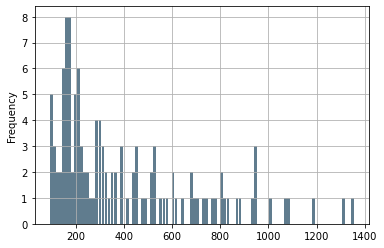

In [29]:
commutes = yang_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [30]:
temp = yang_post[(yang_post['like_count'] <= 1400) & (yang_post['like_count'] > 300)]
temp

,new_date,message,jieba_results,like_count
0,2019-11-13,有自用小船沒有駕照？\n別擔心，有專班讓你上！\n\n近日接獲許多民眾陳情有合法自用小船（過...,有 自用 小船 沒有 駕照 別 擔心 有 專班 讓 你 上 近日 接獲 許多民眾 陳 情有...,1357
1,2019-12-08,許久不見的太陽露臉，今日的陽光剛好搭配各位的熱情，楊曜非常感謝大家的參與以及收看直播。\n\...,許久 不見 的 太陽露 臉 今日 的 陽光剛 好 搭配 各位 的 熱情 楊曜 非常 感謝 ...,1315
2,2019-12-30,這次的選戰，楊曜只有使用一台無聲的胖卡到處跑跑，就是擔心吵到學子上課考試、夜班休息的民眾、醫...,這次 的 選戰 楊曜 只有 使用 一台 無聲 的 胖卡到 處 跑跑 就是 擔心 吵 到 學...,1186
3,2019-12-08,蔡英文楊曜競選總部成立,蔡英文 楊曜 競選總部 成 立,1079
4,2019-11-27,楊曜政績回顧（十二）\n\n【高階醫療設備】\n \n為了提升澎湖醫療品質及減少往返台澎檢查...,楊曜政績 回顧 十二 高階醫療 設備 為 了 提升 澎湖 醫療 品質 及 減少 往返 ...,1072
5,2019-12-28,澎防部遷建案經費到位\n未來結合金龍頭港灣，打造澎湖新亮點\n\n林佳龍今日一早前來澎湖陪同...,澎 防部 遷建案 經費 到位 未來結 合金 龍頭 港灣 打造 澎湖 新亮點 林佳龍 今日 ...,1005
6,2020-01-05,感謝同學一路以來的相挺！\n\n#成長\n#情誼\n#楊曜同學後援會,感謝 同學 一路 以來 的 相挺 # 成長 # 情誼 # 楊曜 同學後援會,951
7,2019-10-31,澎湖長照醫療綜合大樓，列入前瞻計畫\n\n今年5/30立法院衛環委員會考察澎湖醫院，楊曜提出...,澎湖 長 照 醫療 綜合大樓 列入 前瞻 計畫 今年 / 立法院 衛環委員會 考察 澎...,945
8,2019-11-21,楊曜政績回顧（十一）\n\n【１億８千萬專款】\n\n有鑑於澎湖海洋資源出現枯竭現象以及各漁...,楊曜政績 回顧 十一 １ 億 ８ 千萬 專款 有鑑 於 澎湖 海洋 資源 出現 枯竭 現象...,944
9,2019-12-18,懇請支持\n總統③號蔡英文\n立委③號楊 曜\n\n楊曜兩任立委認真為澎湖各項權益與建...,懇請 支持 總統 ③ 號 蔡英文 立委 ③ 號楊 曜 楊曜 兩任 立委 認...,938


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [31]:
corpus = temp['jieba_results'].values.tolist()

In [32]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [33]:
#使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=8, random_state=None)
LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['成立', '澎湖', '感謝', '認真', '做事', '到場', '楊曜', '蔡英文', '援會', '住民']
TOP 10 WORDS PER TOPIC #1
['樂活', '還沒有', '補貼', '領取', '澎湖', '申請', '老年', '經費', '創客', '基地']
TOP 10 WORDS PER TOPIC #2
['離島', '提出', '提高', '海洋', '遠東', '看診', '蔡英文', '民航局', '楊曜', '競選總部']
TOP 10 WORDS PER TOPIC #3
['協調', '台北', '軍機', '民航局', '拉票', '引進', '蔡英文', '大家', '澎湖', '楊曜']
TOP 10 WORDS PER TOPIC #4
['同學', '情誼', '多路', '楊曜', '感謝', '管室', '延續', '心導', '醫療', '澎湖']
TOP 10 WORDS PER TOPIC #5
['建設', '返鄉', '醫療', '投入', '馬拉松', '支持', '立委', '楊曜', '美食', '澎湖']
TOP 10 WORDS PER TOPIC #6
['大家', '一起', '直升', '軍人', '起飛', '醫療', '明天', '楊曜', '加班', '澎湖']
TOP 10 WORDS PER TOPIC #7
['公教', '遠航', '加給', '華信', '權益', '立榮', '居民', '航空', '澎湖', '離島']


In [34]:
LDA.fit(X)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['運能', '要求', '其他', '離島', '民航局', '遠東', '楊曜', '立委', '權益', '航空']
TOP 10 WORDS PER TOPIC #1
['遠東', '居民', '華信', '遠航', '立榮', '運能', '加班', '民航局', '楊曜', '澎湖']
TOP 10 WORDS PER TOPIC #2
['爭取', '公教', '馬拉松', '進步', '美食', '加給', '住民', '楊曜', '朋友', '澎湖']
TOP 10 WORDS PER TOPIC #3
['一起', '可以', '經費', '需求', '一定', '提出', '大家', '醫療', '楊曜', '澎湖']
TOP 10 WORDS PER TOPIC #4
['要求', '需求', '返鄉', '澎湖', '航空', '離島', '加班', '協調', '民航局', '楊曜']
TOP 10 WORDS PER TOPIC #5
['提升', '心導', '部立', '楊曜', '中心', '引進', '醫事', '醫療', '醫院', '澎湖']
TOP 10 WORDS PER TOPIC #6
['鄉親', '支持', '改建', '大家', '認真', '醫療', '離島', '蔡英文', '澎湖', '楊曜']
TOP 10 WORDS PER TOPIC #7
['協調', '輸運', '小英', '登記', '今日', '台北', '民航局', '軍機', '澎湖', '楊曜']


In [37]:
politics_yang = politics[politics.姓名 == "楊曜Yangyao"].政見.to_string()
politics_yang = re.sub(re_punctuation, "", politics_yang)
politics_yang = re.sub(r'[0-9]','',politics_yang)
politics_yang = re.sub(r'[a-zA-Z]','',politics_yang)
jieba.load_userdict("yang_dict.txt")
words = jieba.lcut(politics_liu, cut_all = False)
print(words)

[' ', ' ', ' ', ' ', '一', '、', '持續', '配合', '縣', '政府', '、', '議會', '、', '鄉鎮', '市公所', '、', '代表', '會', '向', '中央', '爭取', '年度', '施政', '計畫', '預算', '補助', '。', '二', '、', '問政', '、', '選民服', '...']


In [38]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(words)  
word = vectorizer.get_feature_names() 
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

LDA.fit(tfidf)

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['持續', '施政', '議會', '中央', '預算', '年度', '市公所', '選民服', '配合', '計畫']
TOP 10 WORDS PER TOPIC #1
['施政', '預算', '年度', '議會', '中央', '市公所', '選民服', '配合', '計畫', '代表']
TOP 10 WORDS PER TOPIC #2
['年度', '預算', '議會', '中央', '市公所', '選民服', '配合', '計畫', '鄉鎮', '問政']
TOP 10 WORDS PER TOPIC #3
['施政', '預算', '中央', '市公所', '選民服', '配合', '計畫', '年度', '議會', '持續']
TOP 10 WORDS PER TOPIC #4
['持續', '年度', '議會', '市公所', '選民服', '配合', '計畫', '中央', '預算', '施政']
TOP 10 WORDS PER TOPIC #5
['施政', '年度', '預算', '中央', '議會', '市公所', '選民服', '配合', '計畫', '政府']
TOP 10 WORDS PER TOPIC #6
['持續', '施政', '年度', '預算', '議會', '中央', '計畫', '市公所', '選民服', '配合']
TOP 10 WORDS PER TOPIC #7
['議會', '年度', '預算', '中央', '市公所', '選民服', '配合', '計畫', '爭取', '補助']
